#### `todo`: how to use SHAPley for boosted trees

# TODO RI vs ARI vs AMI

In [ ]:
k-means
DBSCAN
Hierarchical clustering

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
data

(array([[-7.98709086,  2.14124235],
        [-4.45357591,  2.23847729],
        [-3.13541976, -5.45779879],
        ...,
        [-3.59045593,  2.07468367],
        [-3.92660757,  1.12854964],
        [-5.90152227,  1.34906732]]),
 array([4, 4, 2, 1, 1, 2, 3, 2, 0, 0, 1, 1, 1, 1, 3, 2, 2, 0, 3, 4, 3, 0,
        1, 3, 4, 1, 2, 0, 3, 4, 1, 4, 4, 3, 2, 2, 2, 3, 0, 1, 4, 1, 4, 2,
        1, 3, 1, 3, 0, 3, 0, 4, 2, 4, 2, 1, 1, 2, 1, 1, 1, 0, 3, 3, 1, 1,
        3, 3, 1, 0, 4, 3, 4, 2, 3, 0, 2, 3, 2, 0, 4, 3, 4, 2, 1, 1, 4, 0,
        3, 1, 2, 3, 1, 4, 2, 2, 2, 0, 3, 1, 0, 4, 1, 0, 0, 1, 2, 2, 1, 1,
        1, 2, 4, 0, 3, 1, 4, 2, 1, 3, 3, 1, 1, 0, 0, 0, 4, 2, 3, 4, 3, 4,
        4, 2, 0, 3, 3, 2, 1, 4, 4, 1, 3, 3, 2, 0, 0, 4, 2, 2, 0, 4, 1, 2,
        2, 0, 1, 1, 0, 4, 0, 2, 1, 4, 4, 1, 2, 4, 3, 3, 3, 0, 0, 0, 1, 1,
        2, 2, 1, 3, 4, 4, 0, 4, 2, 3, 0, 2, 2, 0, 0, 3, 4, 4, 2, 4, 1, 3,
        1, 4, 0, 3, 3, 4, 2, 3, 1, 0, 4, 4, 1, 0, 1, 3, 0, 0, 0, 0, 2, 2,
        4, 3, 0, 0, 1, 3, 3, 

In [15]:
data.min()

-14.667591820774744

In [16]:
data.max()

14.979523793952692

In [21]:

random = np.random.RandomState(5)
noise = (data.max()-data.min())*random.rand(200)+data.min()


In [22]:
noise.min()

-14.6189061364028

In [23]:
noise.max()

14.897266880366713

In [25]:
data.shape

(1000, 2)

In [27]:
noise.shape

(200,)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7516275ee0>
Traceback (most recent call last):
  File "/home/anvar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/anvar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/anvar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/anvar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


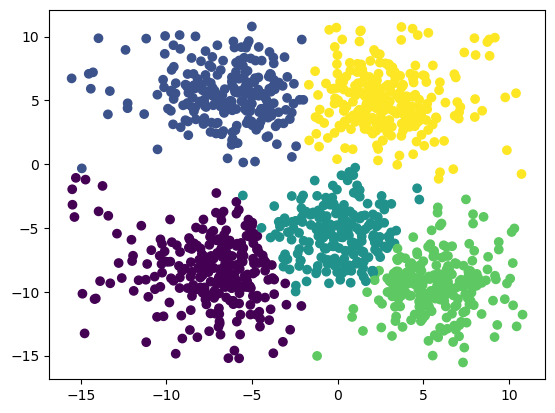

In [67]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np

# Generate random data
data = np.random.rand(100, 2)

data, y = make_blobs(1000,cluster_std=2.0, centers=5,random_state=10 )

random = np.random.RandomState(5)
noise = (data.max()-data.min())*random.rand(200,2)+data.min()

data = np.concatenate((data,noise))

# Create KMeans object with 3 clusters
kmeans = KMeans(n_clusters=5)

# Fit KMeans object to data
kmeans.fit(data)

# Predict cluster labels for data
labels_kmeans = kmeans.predict(data)

# Visualize results
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1], c=labels_kmeans)
plt.show()


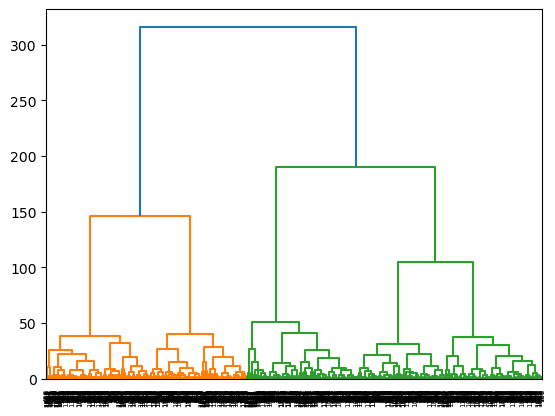

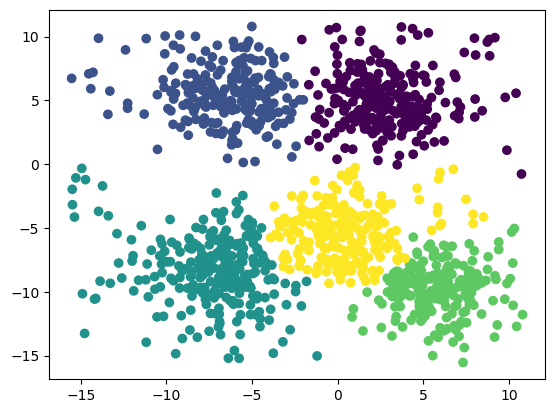

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Generate random data
# data = np.random.rand(100, 2)

# Compute linkage matrix using Ward's method
Z = linkage(data, method='ward')

# Plot dendrogram
dendrogram(Z)
plt.show()

# Cut dendrogram at height 3 to obtain clusters
from scipy.cluster.hierarchy import fcluster

labels_hierarchical = fcluster(Z, 90, criterion='distance')

# Visualize results
plt.scatter(data[:,0], data[:,1], c=labels_hierarchical)
plt.show()


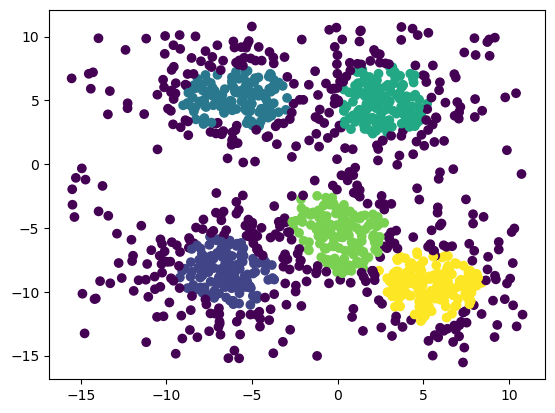

In [69]:
from sklearn.cluster import DBSCAN
import numpy as np

# Generate random data
# data = np.random.rand(100, 2)

# Create DBSCAN object with epsilon=0.1 and min_samples=5
dbscan = DBSCAN(eps=1.35, min_samples=35)

# Fit DBSCAN object to data
dbscan.fit(data)

# Predict cluster labels for data (-1 denotes noise points)
labels_dbscan = dbscan.labels_

# Visualize results
plt.scatter(data[:,0], data[:,1], c=labels_dbscan)
plt.show()


In [62]:
np.unique(labels_dbscan, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([492, 135, 132, 140, 147, 154]))

In [63]:
np.unique(labels_hierarchical, return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int32), array([251, 235, 267, 212, 235]))

In [64]:
np.unique(labels_kmeans, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([260, 253, 231, 237, 219]))

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(labels_hierarchical, labels_kmeans)

0.20916666666666667

Rand Index

Random

Rand's Index

In [90]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [76]:
from scipy import sparse as sp

In [82]:
def contingency_matrix(
    labels_true, labels_pred, *, eps=None, sparse=False, dtype=np.int64
):
  
    if eps is not None and sparse:
        raise ValueError("Cannot set 'eps' when sparse=True")

    classes, class_idx = np.unique(labels_true, return_inverse=True)
    clusters, cluster_idx = np.unique(labels_pred, return_inverse=True)
    n_classes = classes.shape[0]
    n_clusters = clusters.shape[0]
    # Using coo_matrix to accelerate simple histogram calculation,
    # i.e. bins are consecutive integers
    # Currently, coo_matrix is faster than histogram2d for simple cases
    contingency = sp.coo_matrix(
        (np.ones(class_idx.shape[0]), (class_idx, cluster_idx)),
        shape=(n_classes, n_clusters),
        dtype=dtype,
    )
    if sparse:
        contingency = contingency.tocsr()
        contingency.sum_duplicates()
    else:
        contingency = contingency.toarray()
        if eps is not None:
            # don't use += as contingency is integer
            contingency = contingency + eps
    return contingency

In [85]:
def pair_confusion_matrix(labels_true, labels_pred):

#     labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples = np.int64(labels_true.shape[0])

    # Computation using the contingency data
    contingency = contingency_matrix(
        labels_true, labels_pred, sparse=True, dtype=np.int64
    )
#     print(contingency)
    n_c = np.ravel(contingency.sum(axis=1))
    n_k = np.ravel(contingency.sum(axis=0))
    sum_squares = (contingency.data**2).sum()
    C = np.empty((2, 2), dtype=np.int64)
    C[1, 1] = sum_squares - n_samples
    C[0, 1] = contingency.dot(n_k).sum() - sum_squares
    C[1, 0] = contingency.transpose().dot(n_c).sum() - sum_squares
    C[0, 0] = n_samples**2 - C[0, 1] - C[1, 0] - sum_squares
    return C

In [88]:
def rand_index(labels_true, labels_pred):
    (tn, fp), (fn, tp) = pair_confusion_matrix(labels_true, labels_pred)#labels_kmeans, labels_hierarchical)
    # convert to Python integer types, to avoid overflow or underflow
    tn, fp, fn, tp = int(tn), int(fp), int(fn), int(tp)
    return (tp+tn)/(tn+fp+fn+tp)

In [89]:
rand_index(labels_kmeans, labels_hierarchical)

0.9825396163469557

In [91]:
adjusted_rand_score(labels_kmeans, labels_hierarchical)

0.945496092450108

In [92]:
adjusted_mutual_info_score(labels_kmeans, labels_hierarchical)

0.9371422103334176

In [96]:
labels_kmeans.shape

(1200,)

In [116]:
y_random = random.randint(0,5,1200)
rand_index(labels_kmeans, y_random)

0.6797275507367251

In [117]:
adjusted_rand_score(labels_kmeans, y_random)

-0.00022587038677847647

In [118]:
adjusted_mutual_info_score(labels_kmeans, y_random)

-0.00012806842493994373

http://proceedings.mlr.press/v139/gosgens21a/gosgens21a.pdf

In [93]:
rand_index(labels_kmeans, labels_dbscan)

0.7709758131776481

In [94]:
adjusted_rand_score(labels_kmeans, labels_dbscan)

0.3311748138908887

In [95]:
adjusted_mutual_info_score(labels_kmeans, labels_dbscan)

0.5897596833123436

# Снижение размерности

X (1000x20)

X 

- n - observations
- m - features
- k - new features

k < m

In [ ]:
unsupervised
обучение без учителя

In [ ]:
Кластеризация X (1000x20) --> (5x1000)
Снижение размерности X(1000x20) --> (1000x5)

In [ ]:
PCA - Principal Component Analysis
Метод главных компонент

## Пример 1.

Давайте для начала рассмотрим следующий пример:

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
X = np.array([[2,3,4,7,10], [1,1,1,1,1]]).T

In [121]:
X

array([[ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 7,  1],
       [10,  1]])

У нас есть 5 наблюдений и два признака, вопрос, какой из признаков
вам кажется **важнее** и почему?

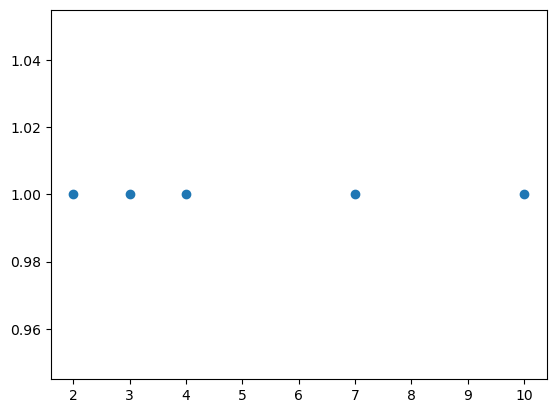

In [122]:
plt.scatter(X[:, 0], X[:, 1]);

Естественным ответом кажется сказать что первый, потому что этот признак **изменяется** от объекта к объекту,
а второй признак - нет. 

Вопрос: Что значит **изменяется**?

Хорошо, давайте теперь на другой пример:

In [125]:
X = np.array([[2,3,4,7,10], [4,6,8,14,20]]).T
# X = np.array([[2,3,4,7,10], [2,3,4,7,10]]).T

X.std(axis=0)

array([2.92574777, 5.85149554])

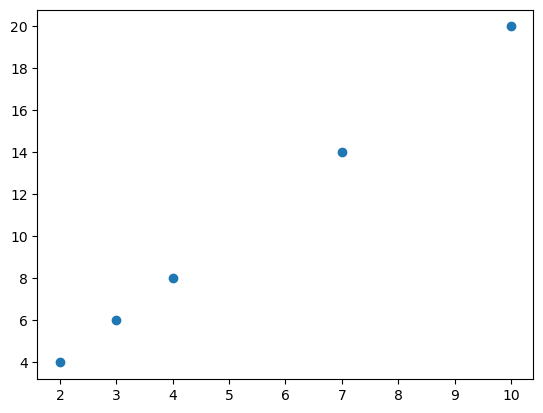

In [124]:
plt.scatter(X[:, 0], X[:, 1]);

Какой из признаков важнее здесь?

Ответить уже не так легко, изменение происходит как по первой координате, так и по второй, но что если мы повернем картинку (скажем на 60 градусов)?

In [126]:
alpha = np.pi / 3
rot_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                      [np.sin(alpha), np.cos(alpha)]])

X_rot = X.dot(rot_matrix)

In [127]:
X_rot

array([[ 4.46410162,  0.26794919],
       [ 6.69615242,  0.40192379],
       [ 8.92820323,  0.53589838],
       [15.62435565,  0.93782217],
       [22.32050808,  1.33974596]])

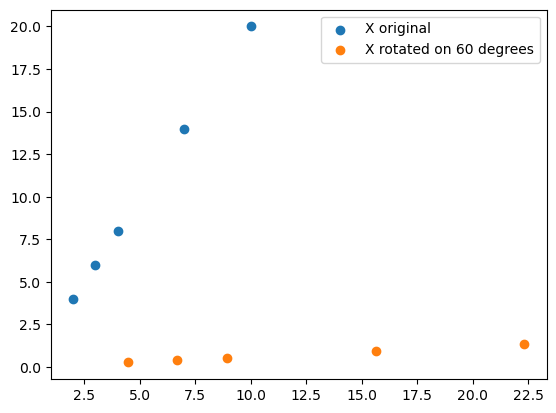

In [128]:
plt.scatter(X[:, 0], X[:, 1], label='X original');
plt.scatter(X_rot[:, 0], X_rot[:, 1], label='X rotated on 60 degrees');
plt.legend();

Можем ли мы теперь сказать какой из признаков для нас **важнее**?

Итак за словами **изменяется** и **важнее** на самом деле скрывается слово **Дисперсия**.

Посмотрим на еще один пример:

In [129]:
random = np.random.RandomState(7)
time_steps = np.linspace(0, 10, 40).reshape(-1, 1)
X = time_steps + 2*random.normal(scale = .6, size=(40,1))
X = np.concatenate((time_steps, X), axis=1 )

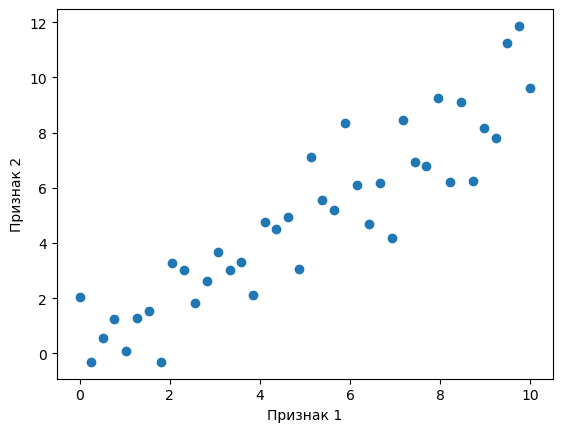

In [130]:
plt.scatter(X[:, 0], X[:, 1]);
plt.xlabel('Признак 1')
plt.ylabel('Признак 2');

In [ ]:
Singular Value Decomposition
SVD

In [ ]:
X(1000,20) * w(20,10) -> X_pca(1000,10)

Как видно дисперсия внутри **Признака 1** немногим меньше дисперсии внутри **Признака 2**.

### Вопрос

Существует ли какая то **их линейная комбинация**: какой то новый признак, дисперсия внутри которого будет **больше**?

## Ответ

да существует!

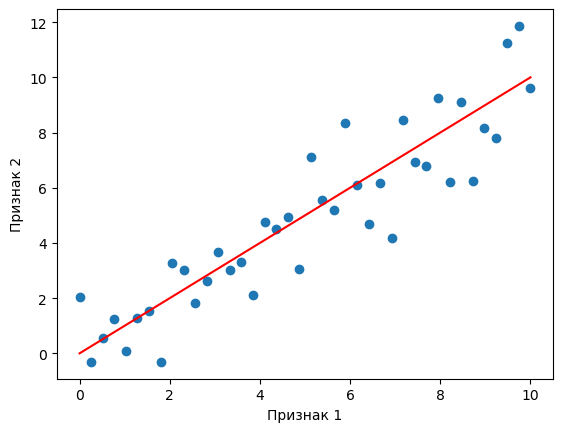

In [131]:
plt.scatter(X[:, 0], X[:, 1]);
plt.xlabel('Признак 1')
plt.ylabel('Признак 2');
plt.plot([0, 10], [0, 10], c='r');

In [132]:
X.std(axis=0)

array([2.95984523, 3.13544252])

А что это за направление?

В нашем случае это простой поворот на 45 градусов

In [133]:
alpha = np.pi / 4
rot_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                      [np.sin(alpha), np.cos(alpha)]])

X_rot = X.dot(rot_matrix)

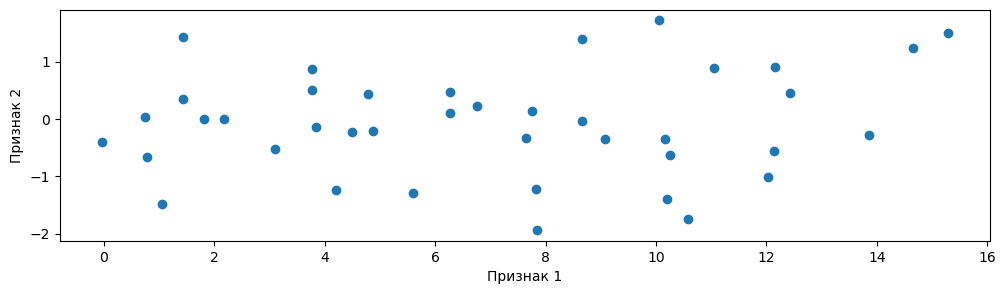

In [134]:
plt.figure(figsize=(12, 3))
plt.scatter(X_rot[:, 0], X_rot[:, 1]);
plt.xlabel('Признак 1')
plt.ylabel('Признак 2');

In [136]:
print('Дисперсия 1 признака: {:.3f}; Дисперсия 2 признака: {:.3f}'.format(X[:, 0].std(), 
                                                                          X[:, 1].std()))

print('Дисперсия 1 компоненты: {:.3f}; Дисперсия 2 компоненты: {:.3f}'.format(X_rot[:, 0].std(), 
                                                                              X_rot[:, 1].std()))

Дисперсия 1 признака: 2.960; Дисперсия 2 признака: 3.135
Дисперсия 1 компоненты: 4.216; Дисперсия 2 компоненты: 0.906


# PCA

метод который называется Principal Component Analysis позволяет выделять эти компоненты.

In [140]:
from sklearn.decomposition import PCA

In [141]:
pca = PCA(2)
xpca = pca.fit_transform(X)

In [139]:
pca.components_

array([[ 0.68446299,  0.72904761],
       [ 0.72904761, -0.68446299]])

In [144]:
rot_matrix

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Сравните эти компоненты с матрицей поворота, есть ли отличия?

In [145]:
print('Дисперсия 1 компоненты: {:.3f}; Дисперсия 2 компоненты: {:.3f}'.format(X.dot(pca.components_[0]).std(),
                                                                              X.dot(pca.components_[1]).std()))

Дисперсия 1 компоненты: 4.218; Дисперсия 2 компоненты: 0.897


Как видно **PCA** нашел лучшие направления чем поворот на 45 градусов.

### Оказывается для наших данных достаточно измерить только 1 признак, 2ой же признак является избыточным!

----

До сих пор мы смотрели на двумерные примеры и из двумерных данных путем преобразования системы координат получали новые двумерные данные. Давайте рассмотрим пример посложнее:

## Пример 2.
Хорошо давайте теперь рассмотрим другой пример

![pca](pca_example.png)


>Pretend we are studying the motion
of the physicist’s ideal spring. This system consists of a ball
of mass `m` attached to a massless, frictionless spring. The ball
is released a small distance away from equilibrium (i.e. the
spring is stretched). Because the spring is ideal, it oscillates
indefinitely along the x-axis about its equilibrium at a set frequency.
However, being ignorant experimenters we do not know any of this. We do not know which, let alone how many, axes
and dimensions are important to measure. Thus, we decide to measure the ball’s position in a three-dimensional space (since we live in a three dimensional world). Specifically, we place three movie cameras around our system of interest. At 120 Hz each movie camera records an image indicating a two dimensional position of the ball (a projection). Unfortunately, because of our ignorance, we do not even know what are the real `x`, `y` and `z` axes, so we choose **three camera positions a,b and c at some arbitrary angles** with respect to the system. The angles
between our measurements might not even be 90 degrees! Now, we record with the cameras for several minutes. The big question remains: how do we get from this data set to a simple equation of `x`?

**A Tutorial on Principal Component Analysis** https://arxiv.org/pdf/1404.1100.pdf 

In [146]:
def generate_points(random_state=331):
    random = np.random.RandomState(random_state)
    time_steps = np.linspace(0, 10, 40).reshape(-1, 1)
    X = time_steps + 3*random.normal(scale=0.3, size=(40,1))
    X = np.concatenate((time_steps, X), axis=1 )

    alpha = -np.pi/2
    beta = np.pi/4
    rot_matrix_1 = np.array([[np.cos(alpha), -np.sin(alpha)],
                          [np.sin(alpha), np.cos(alpha)]])
    rot_matrix_2 = np.array([[np.cos(beta), -np.sin(beta)],
                          [np.sin(beta), np.cos(beta)]])

    X_rot1 = X.dot(rot_matrix_1)
    X_rot2 = X.dot(rot_matrix_2) + 5
    
    return X, X_rot1, X_rot2

In [147]:
camera1, camera2, camera3 = generate_points()

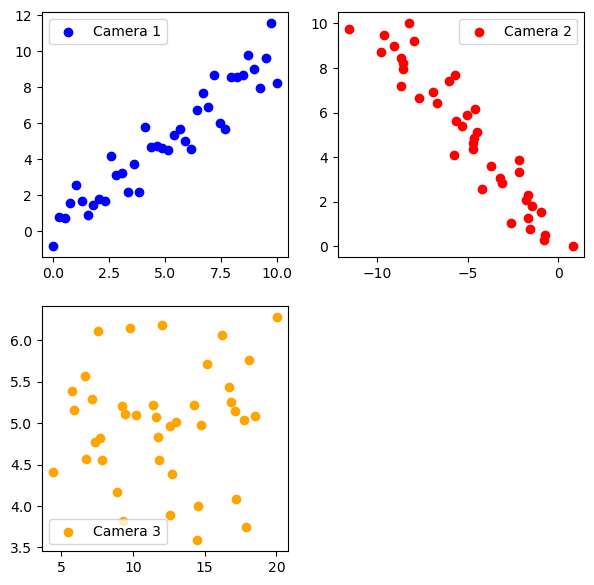

In [148]:
plt.figure(figsize=(7,7))
ax1 = plt.subplot(2,2,1)
ax1.scatter(camera1[:, 0], camera1[:, 1], label='Camera 1', c='b')
ax1.legend();
ax2 = plt.subplot(2,2,2)
ax2.scatter(camera2[:, 0], camera2[:, 1], label='Camera 2', c='r')
ax2.legend();
ax3 = plt.subplot(2,2,3)
ax3.scatter(camera3[:, 0], camera3[:, 1], label='Camera 3', c='orange')
ax3.legend();

In [149]:
X = np.concatenate((camera1, camera2, camera3), axis=1)

In [150]:
X.shape

(40, 6)

In [151]:
X =(X - X.mean(axis=0))

Итак для каждого наблюдения мы располагаем **6 измерениями** (2 координаты с каждой камеры). 
Но мы то знаем что на самом деле пружина изменялась только вдоль **одного единственного направления**!

In [152]:
pca = PCA(4)
X_pca = pca.fit_transform(X)
X_pca.shape

(40, 4)

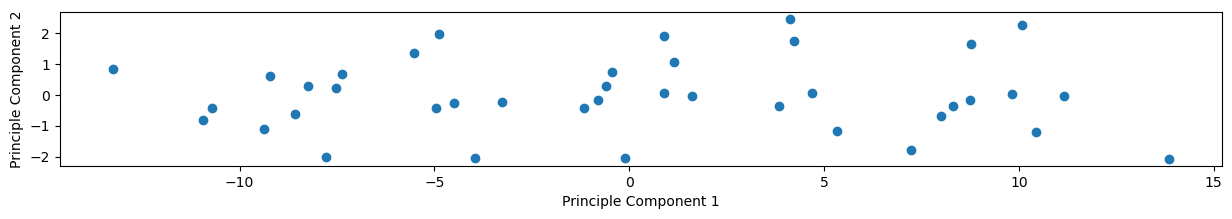

In [153]:
plt.figure(figsize=(15, 2))
plt.scatter(X_pca[:, 0], X_pca[:, 1]);
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2');

In [154]:
for idx, feature in enumerate(X.T):
    print('Дисперсия признака {}: {:.3f}'.format(idx+1, feature.std()))

Дисперсия признака 1: 2.960
Дисперсия признака 2: 3.023
Дисперсия признака 3: 3.023
Дисперсия признака 4: 2.960
Дисперсия признака 5: 4.174
Дисперсия признака 6: 0.687


In [159]:
for idx, feature in enumerate(X_pca.T):
    print('Дисперсия компоненты {}: {:.3f}'.format(idx+1, feature.std()**2))

Дисперсия компоненты 1: 52.285
Дисперсия компоненты 2: 1.411
Дисперсия компоненты 3: 0.000
Дисперсия компоненты 4: 0.000


In [160]:
pca.explained_variance_ratio_

array([9.73722501e-01, 2.62774994e-02, 1.04051884e-32, 1.95827311e-33])

In [161]:
52.285/(52.285 + 1.411)

0.9737224374255066

Таким образом метод главных компонент позволяет **снизить размерность данных**, преобразуя старые признаки в новые.

## PCA важное

![pca](pca2.png)



$$ X_{n \times m} \rightarrow X^{\text{reduced}}_{n \times k},\ \ \  \text{s.t.} \ \ \  k < m$$
                        
$$X_{n \times m} \cdot S_{m\times k} = X^{\text{reduced}}_{n \times k}$$



1. PCA проецирует данные на новый признаки, которые являются линейной комбинацией старых.
2. Новые признаки называются компонентами (или Главными компонентами). Эти направления попарно ортогональны.
3. Мерой важности новых признаков является **доля объясненнной дисперсии**.
4. Перед применением метода Главных компонент данные необходимо центрировать

---

* Подробный туториал по методу главных компонент https://arxiv.org/pdf/1404.1100.pdf (на английском)
* Серия из 3 видео посвященных более подробному разбору в том числе пример вычисления руками (на русском) 
    * https://www.youtube.com/watch?v=NKmwnILrHD8&t=
    * https://www.youtube.com/watch?v=cgdnlSv6kpg
    * https://www.youtube.com/watch?v=WP2VLhAAM24&t=
* Статья из цикла статей открытого курса по машинному обучению https://habr.com/ru/company/ods/blog/325654/ (на русском)
    
    
----

В пакете sklearn есть специальный класс PCA который реализует метод главных компонент.

основные параметры, которые можно увидеть после обучения:
* `.components_` - новые компоненты (количество - n_components). Каждая компонента - линейная комбинация изначальных признаков (представлна вектором длинной изначального количества признаков).

Например если X имеет размер $100 \times 5$, и мы хотим найти 3 главные компоненты, то после обучения поле `.components_` будет содержать матрицу размера $3 \times 5$, т.е. задача PCA найти такое P, что:


* `.explained_variance_` и `.explained_variance_ratio_` - объясненная дисперсия и доля объясненной дисперсии каждой компонентой.

In [162]:
pca.components_[1]

array([ 0.41276569, -0.40368034,  0.40368034,  0.41276569,  0.00642432,
       -0.57731453])

In [163]:
pca.components_

array([[ 0.40368034,  0.41276569, -0.41276569,  0.40368034,  0.57731453,
         0.00642432],
       [ 0.41276569, -0.40368034,  0.40368034,  0.41276569,  0.00642432,
        -0.57731453],
       [-0.35755983, -0.28857231,  0.30311234, -0.19737474,  0.81078223,
         0.02598623],
       [-0.35133733,  0.36685119, -0.19187608, -0.23131458,  0.01691727,
        -0.80707696]])

## Пример 3. Digits.

Давайте посмотрим на то насколько наши рукописные цифры с 64 признаками можно хорошо спроецировать на 2 измерения.

In [164]:
from sklearn.datasets import load_digits

In [191]:
X, y = load_digits(n_class=10, return_X_y=True)

# X = np.vstack([X[y==4], X[y==5]])
# y = [4]*181+[5]*182

In [192]:
X.shape

(1797, 64)

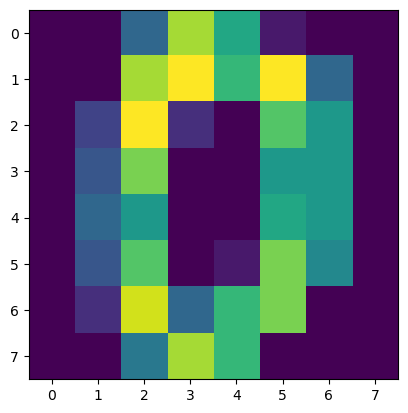

In [193]:
plt.imshow(X[0].reshape(8,8))

In [194]:
pca = PCA(2)

X_pca = pca.fit_transform(X)

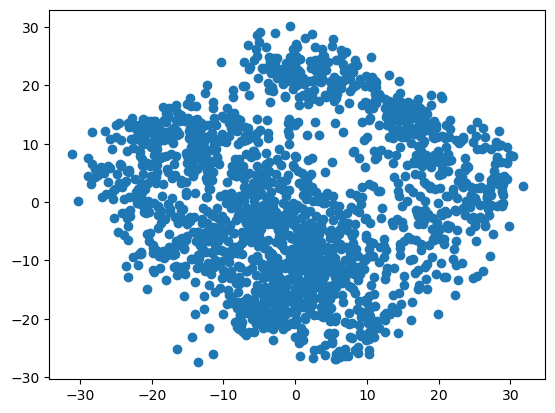

In [195]:
plt.scatter(X_pca[:, 0], X_pca[:, 1]);

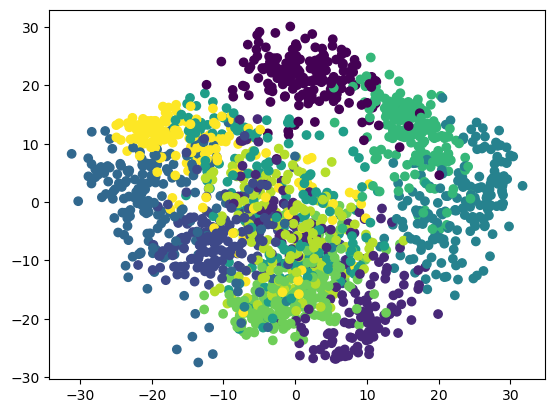

In [196]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

In [ ]:
X * W

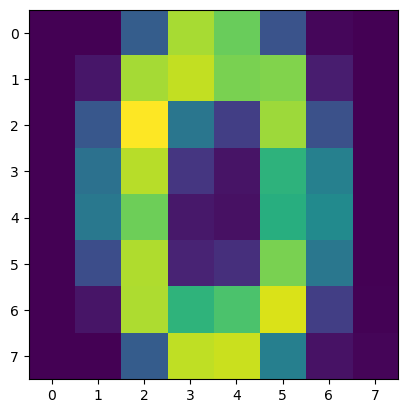

In [181]:
new_0 = [-20, 0] # 0,1
# new_0 = [-20, 20] # 4,5
plt.imshow(pca.inverse_transform(new_0).reshape(8,8));

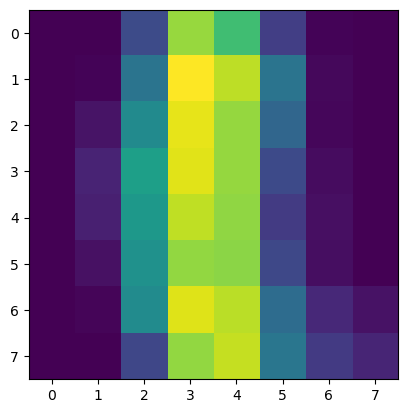

In [182]:
new_0 = [20, -10] # 0,1
# new_0 = [20, -10] # 4,5
plt.imshow(pca.inverse_transform(new_0).reshape(8,8));

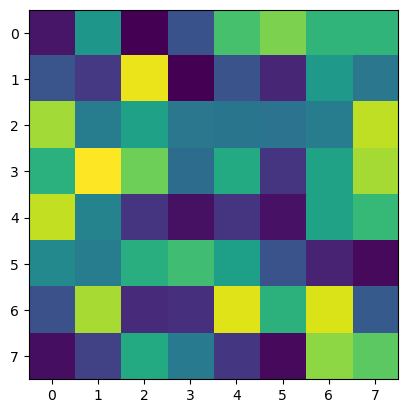

In [180]:
plt.imshow(np.random.rand(64).reshape(8,8));

In [183]:
# y = 0.25*x + 5 # 0,1
# y = -0.75*x + 5 # 4,5

x_coords = np.linspace(-20, 20, 20)
# y_coords = 0.25 * x_coords + 5
y_coords = -0.75 * x_coords + 5
xy_coords = np.vstack([x_coords, y_coords]).T
new_digits = pca.inverse_transform(xy_coords).reshape(20, 8, 8)

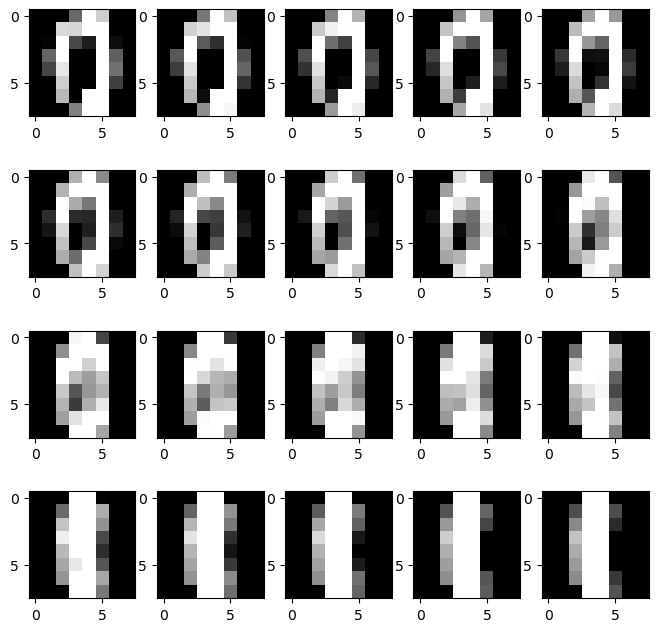

In [184]:
fig, axs = plt.subplots(4, 5, figsize=(8,8))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(np.clip(new_digits[i], 4, 10), cmap='gray')

* Попробуйте разбить данные на две части: train и test. Обучить преобразование координат с помощью PCA на одной части и потом спроецировать вторую часть данных на найденные компоненты. Сравните с результатом полученным без разделения данных на две части. Постройте доверительный интервал для первой главной компоненты используя метод бутстреппинга. 

* Попробуйте увеличить количество классов (параметр n_class в функции load_digits) и посмотреть как изменятся наши компоненты.

In [ ]:
X*w

In [ ]:
Fair Machine Learning

# Другие методы снижения размерности

TSNE, MDS, LDA, ICA, Random Projection, Autoencoders

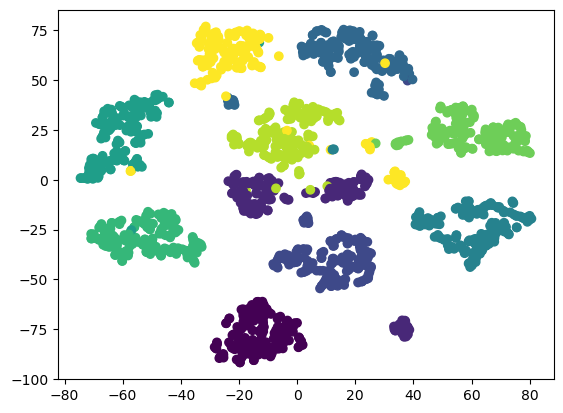

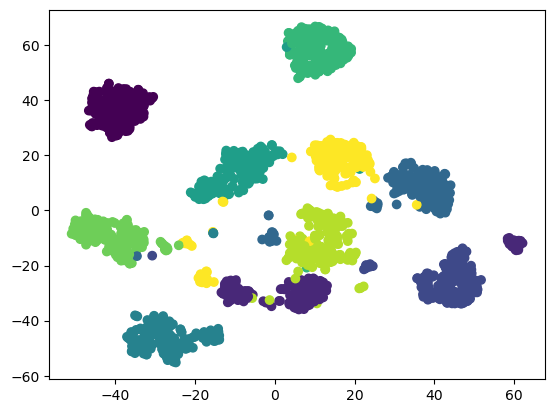

In [198]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=33, perplexity=10)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

tsne = TSNE(random_state=32)
X_tsne = tsne.fit_transform(X)

plt.figure()

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

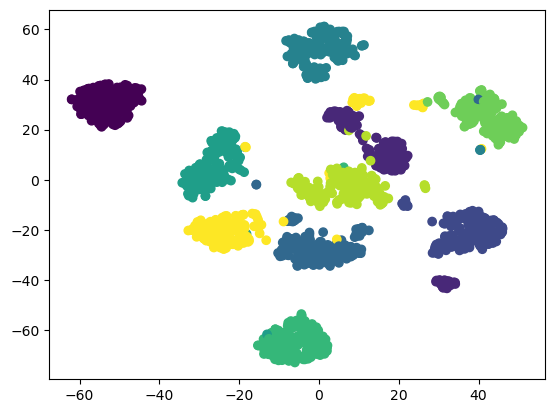

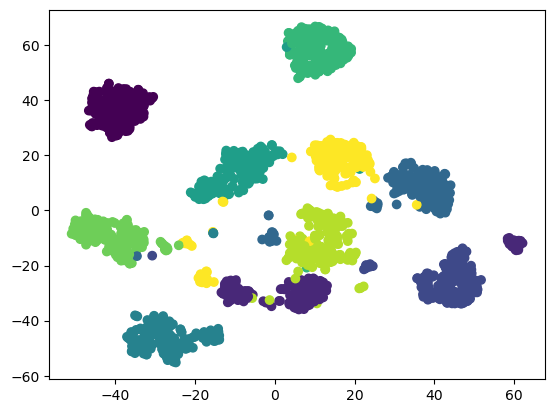

In [199]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=33, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

tsne = TSNE(random_state=32)
X_tsne = tsne.fit_transform(X)

plt.figure()

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y);

# Для чего используют методы снижения размерности?

$$ X_{n \times m} \rightarrow X^{\text{reduced}}_{n \times k},\ \ \  \text{s.t.} \ \ \  k < m$$
                        

- Снижение уровня шума
- Для визуализации
- Для сэмплирования данных
- Для детектирования аномалий
- ...

In [ ]:
https://distill.pub/2016/misread-tsne/
    
    